# Importing Necessary Libraries

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Datset

In [202]:
df = sns.load_dataset("titanic")

In [203]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


# Exploratory Data Analysis(EDA)

In [204]:
df.shape

(891, 15)

In [205]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [207]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [208]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [209]:
df.drop(["deck","embark_town","alive","class","who","adult_male","alive"],axis=1,inplace=True)

In [210]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [211]:
df["age"] = df["age"].fillna(df["age"].mean())


In [212]:
df.dropna(subset=["embarked"], inplace=True)

In [213]:
df.isna().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
alone       0
dtype: int64

In [214]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alone'],
      dtype='object')

In [215]:
cols = ['survived', 'pclass', 'sex', 'sibsp', 'parch','embarked', 'alone']

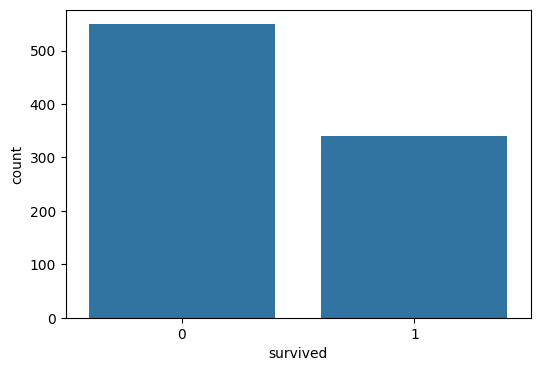

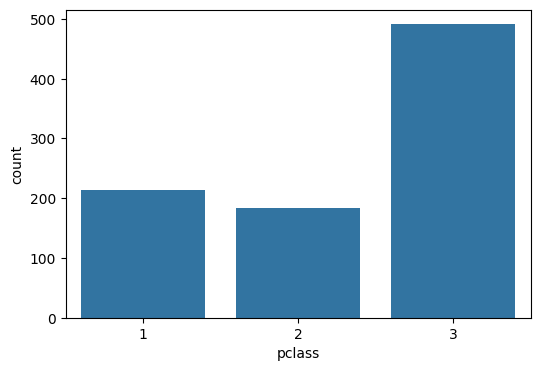

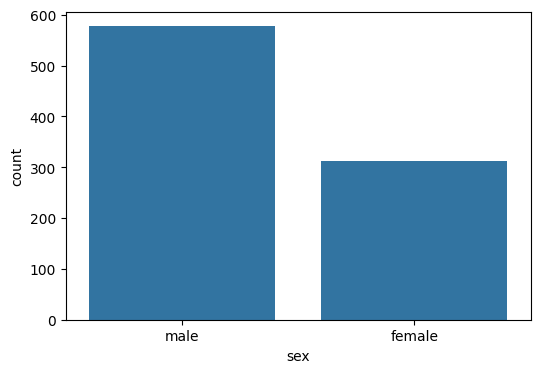

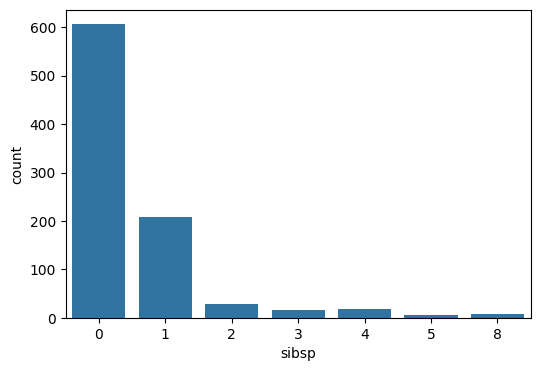

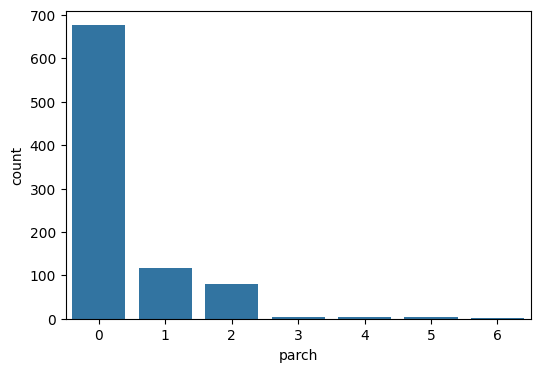

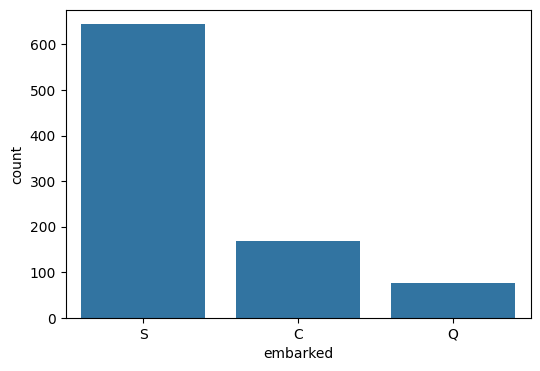

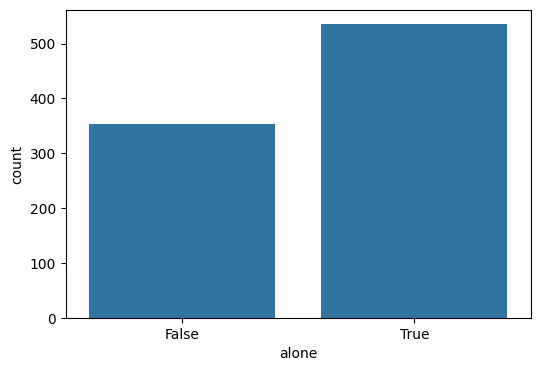

In [216]:
for col in cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col)
    plt.show()

<Axes: xlabel='age', ylabel='Count'>

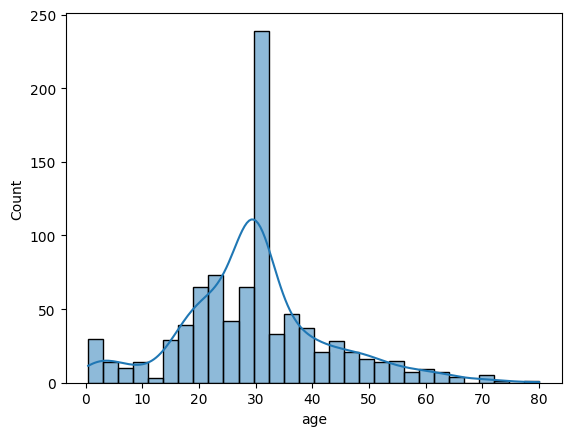

In [217]:
sns.histplot(data=df, x="age",kde=True)

<Axes: xlabel='fare', ylabel='Count'>

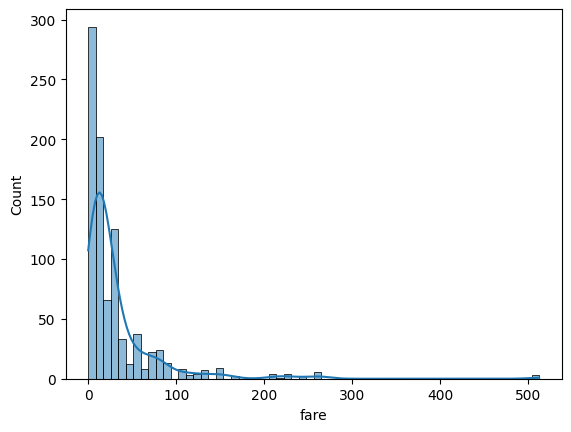

In [218]:
sns.histplot(data=df, x="fare",kde=True)

<Axes: >

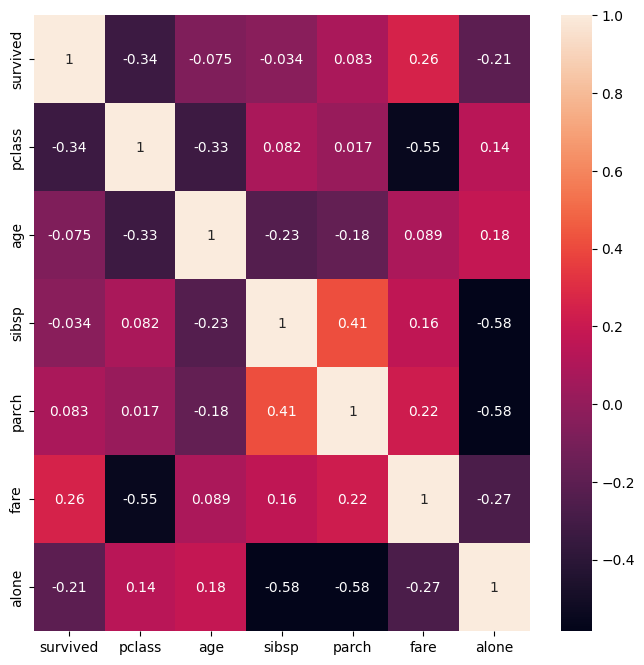

In [219]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(numeric_only=True),annot=True)

# Data Preprocessing

In [220]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,male,22.0,1,0,7.2500,S,False
1,1,1,female,38.0,1,0,71.2833,C,False
2,1,3,female,26.0,0,0,7.9250,S,True
3,1,1,female,35.0,1,0,53.1000,S,False
4,0,3,male,35.0,0,0,8.0500,S,True


In [221]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [222]:
df["sex"] = le.fit_transform(df["sex"])
df["embarked"] = le.fit_transform(df["embarked"])

In [223]:
df = df.astype(int)

In [224]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,22,1,0,7,2,0
1,1,1,0,38,1,0,71,0,0
2,1,3,0,26,0,0,7,2,1
3,1,1,0,35,1,0,53,2,0
4,0,3,1,35,0,0,8,2,1


In [225]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alone'],
      dtype='object')

In [226]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
col = [ 'age',  'fare' ]
df[col] = scaler.fit_transform(df[col])

In [227]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,1,-0.578023,1,0,-0.496733,2,0
1,1,1,0,0.655371,1,0,0.791539,0,0
2,1,3,0,-0.269675,0,0,-0.496733,2,1
3,1,1,0,0.424109,1,0,0.429213,2,0
4,0,3,1,0.424109,0,0,-0.476604,2,1


# Train Test Split

In [228]:
from sklearn.model_selection import train_test_split
X = df.drop("survived",axis=1)
y = df["survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Actual Model Building

In [229]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [ ]:
models ={
    "Logistic Regression" : LogisticRegression(),
    "KNN" : KNeighborsClassifier(),
    "Naive Bayes" : GaussianNB(),
    "Decision Tree" : DecisionTreeClassifier(),
    "SVM" : SVC(),
}

In [231]:
results = []

In [232]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    results.append({
        "Name" : model,
        "Accuracy " :round(acc,4),
        "F1 Score" : round(f1,4),

    })


In [233]:
results

[{'Name': LogisticRegression(), 'Accuracy ': 0.8034, 'F1 Score': 0.7518},
 {'Name': KNeighborsClassifier(), 'Accuracy ': 0.7921, 'F1 Score': 0.7413},
 {'Name': GaussianNB(), 'Accuracy ': 0.7753, 'F1 Score': 0.7297},
 {'Name': DecisionTreeClassifier(), 'Accuracy ': 0.7809, 'F1 Score': 0.7234},
 {'Name': SVC(C=1, gamma=0.1), 'Accuracy ': 0.8202, 'F1 Score': 0.7714}]